In [1]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('미세먼지 데이터.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3831 entries, 0 to 3830
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3831 non-null   object 
 1   PM10            3782 non-null   float64
 2   PM2.5           3831 non-null   int64  
 3   오존              3831 non-null   float64
 4   이산화질소           3831 non-null   float64
 5   일산화탄소           3831 non-null   float64
 6   아황산가스           3820 non-null   float64
 7   season          3831 non-null   int64  
 8   rainfall        1033 non-null   float64
 9   temp            2544 non-null   float64
 10  humidity        2544 non-null   float64
 11  지역              3831 non-null   object 
 12  측정소: 강원대 삼척캠퍼스  0 non-null      float64
dtypes: float64(9), int64(2), object(2)
memory usage: 389.2+ KB


In [5]:
df

,date,PM10,PM2.5,오존,이산화질소,일산화탄소,아황산가스,season,rainfall,temp,humidity,지역,측정소: 강원대 삼척캠퍼스
0,2019-01-01,23.0,14,0.025,0.018,0.3,0.003,4,NaN,NaN,NaN,삼척,NaN
1,2019-01-02,21.0,12,0.027,0.015,0.3,0.003,4,NaN,NaN,NaN,삼척,NaN
2,2019-01-03,22.0,10,0.019,0.025,0.4,0.004,4,NaN,NaN,NaN,삼척,NaN
3,2019-01-04,36.0,20,0.026,0.024,0.4,0.005,4,NaN,NaN,NaN,삼척,NaN
4,2019-01-05,50.0,36,0.031,0.018,0.5,0.004,4,NaN,NaN,NaN,삼척,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,2022-06-26,36.0,10,0.028,0.011,0.6,0.002,2,0.0,26.8,73.3,원주,NaN
3827,2022-06-27,13.0,1,0.013,0.010,0.5,0.002,2,8.3,27.5,69.9,원주,NaN
3828,2022-06-28,18.0,2,0.018,0.008,0.5,0.002,2,0.0,28.6,59.8,원주,NaN
3829,2022-06-29,11.0,3,0.017,0.009,0.5,0.002,2,47.1,25.6,82.3,원주,NaN


In [6]:
# 공백 채우기
df['PM10'] = df['PM10'].fillna(df['PM10'].mean()).astype(float)
df['아황산가스'] = df['아황산가스'].fillna(df['아황산가스'].mean()).astype(float)
# 강수량 ,습도 및 온도는 삼척시 데이터가 없어 춘천 원주의 평균으로 매꿈


In [7]:
df.columns

Index(['date', 'PM10', 'PM2.5', '오존', '이산화질소', '일산화탄소', '아황산가스', 'season',
       'rainfall', 'temp', 'humidity', '지역', '측정소: 강원대 삼척캠퍼스'],
      dtype='object')

In [8]:
#train : test  = 85:15

In [9]:
df['year'] = df['date'].apply(lambda x:x.split('-')[0])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3831 entries, 0 to 3830
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3831 non-null   object 
 1   PM10            3831 non-null   float64
 2   PM2.5           3831 non-null   int64  
 3   오존              3831 non-null   float64
 4   이산화질소           3831 non-null   float64
 5   일산화탄소           3831 non-null   float64
 6   아황산가스           3831 non-null   float64
 7   season          3831 non-null   int64  
 8   rainfall        1033 non-null   float64
 9   temp            2544 non-null   float64
 10  humidity        2544 non-null   float64
 11  지역              3831 non-null   object 
 12  측정소: 강원대 삼척캠퍼스  0 non-null      float64
 13  year            3831 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 419.1+ KB


In [11]:
test = df[df['year'] == '2022']
train = df[df['year'] != '2022']

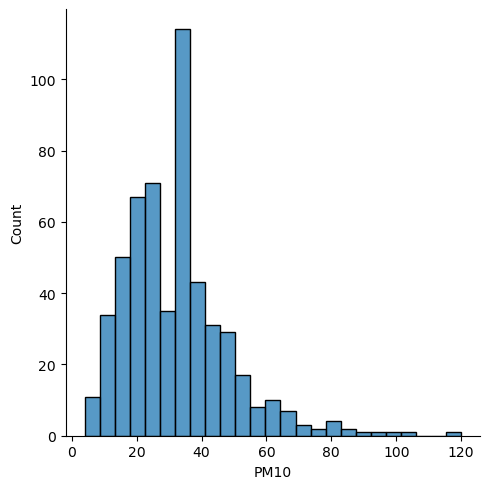

In [12]:
sns.displot(test['PM10'])

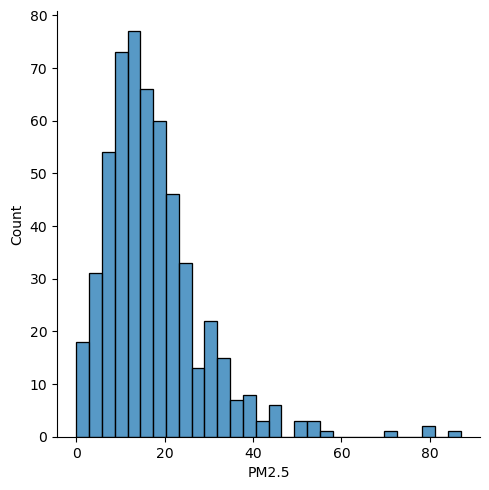

In [13]:
sns.displot(test['PM2.5'])

In [14]:
samcheok_train = train[train['지역']=='삼척']
samcheok_test = test[test['지역']=='삼척']

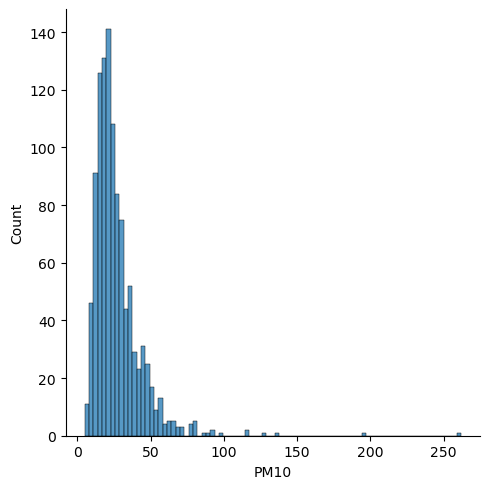

In [15]:
sns.displot(samcheok_train['PM10'])

In [16]:
chuncheon_train = train[train['지역']=='춘천']
chuncheon_test = test[test['지역']=='춘천']

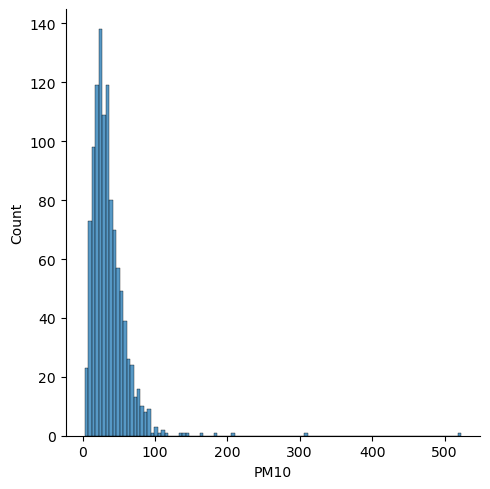

In [17]:
sns.displot(chuncheon_train['PM10'])

In [18]:
wonju_train = train[train['지역']=='원주']
wonju_test = test[test['지역']=='원주']

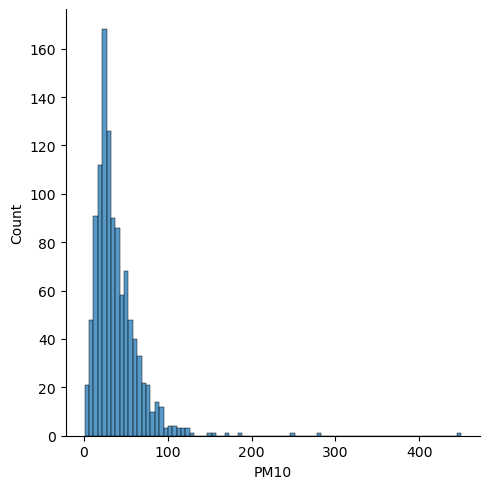

In [19]:
sns.displot(wonju_train['PM10'])

In [1]:
!pip install folium

     ---------------------------------------- 96.5/96.5 kB 2.8 MB/s eta 0:00:00


In [2]:
import folium

In [38]:
# 삼척위도
samcheok_latitude = 37.4439
# 삼척경도
samcheok_longitude = 129.1727

In [71]:
m = folium.Map(location=[samcheok_latitude, samcheok_longitude],
               zoom_start=13
              )
m

In [53]:
# 원주위도
wonju_latitude = 37.3414
# 원주경도
wonju_longitude = 127.9201

In [72]:
m = folium.Map(location=[wonju_latitude, wonju_longitude],
               zoom_start=13
              )
m

In [66]:
# 춘천위도
chuncheon_latitude = 37.8801
# 춘천경도
chuncheon_longitude = 127.7301

In [73]:
m = folium.Map(location=[chuncheon_latitude, chuncheon_longitude],
               zoom_start=13
              )
m

In [99]:
# 강원도위도
kangwon_latitude = 37.818
# 강원도경도
kangwon_longitude = 128.5000

In [105]:
m = folium.Map(location=[kangwon_latitude, kangwon_longitude],
               zoom_start=8
              )

m

In [107]:
m = folium.Map(location=[kangwon_latitude, kangwon_longitude],
               zoom_start=8
              )

marker_samcheok = folium.CircleMarker([37.4439, 129.1727],
                                     radius = 100,
                                     color = 'skyblue',
                                     popup = 'campus seven',
                                     fill_color = 'skyblue')

marker_samcheok.add_to(m)